In [1]:
# Parameters
file_path = "META.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,288.500000,297.399994,287.670013,294.239990,293.636597,18287000
1,2023-08-24,298.500000,299.459991,286.640015,286.750000,286.161957,18360900
2,2023-08-25,286.130005,288.390015,276.029999,285.500000,284.914520,23701400
3,2023-08-28,288.000000,291.450012,285.799988,290.260010,289.664764,14239300
4,2023-08-29,288.579987,299.149994,288.179993,297.989990,297.378906,20844500
...,...,...,...,...,...,...,...
247,2024-08-16,531.900024,533.659973,524.659973,527.419983,527.419983,14776700
248,2024-08-19,526.869995,531.659973,522.760010,529.280029,529.280029,9879700
249,2024-08-20,528.349976,531.090027,525.880005,526.729980,526.729980,7944400
250,2024-08-21,527.150024,539.400024,526.929993,535.159973,535.159973,13423300


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,294.239990
1,2023-08-24,286.750000
2,2023-08-25,285.500000
3,2023-08-28,290.260010
4,2023-08-29,297.989990
...,...,...
247,2024-08-16,527.419983
248,2024-08-19,529.280029
249,2024-08-20,526.729980
250,2024-08-21,535.159973


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_87314/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,294.239990
2023-08-24,286.750000
2023-08-25,285.500000
2023-08-28,290.260010
2023-08-29,297.989990
...,...
2024-08-16,527.419983
2024-08-19,529.280029
2024-08-20,526.729980


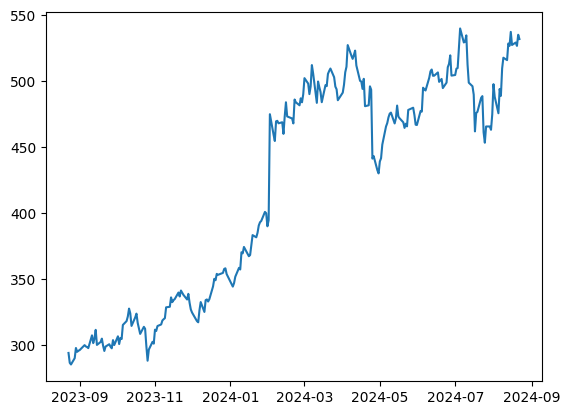

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,294.239990,286.750000,285.500000,290.260010,297.989990,295.100006,295.890015,296.380005,300.149994,...,299.079987,300.829987,298.959991,297.739990,303.959991,300.209991,306.820007,300.940002,305.579987,304.790009
1,2023-10-06,286.750000,285.500000,290.260010,297.989990,295.100006,295.890015,296.380005,300.149994,299.170013,...,300.829987,298.959991,297.739990,303.959991,300.209991,306.820007,300.940002,305.579987,304.790009,315.429993
2,2023-10-09,285.500000,290.260010,297.989990,295.100006,295.890015,296.380005,300.149994,299.170013,298.670013,...,298.959991,297.739990,303.959991,300.209991,306.820007,300.940002,305.579987,304.790009,315.429993,318.359985
3,2023-10-10,290.260010,297.989990,295.100006,295.890015,296.380005,300.149994,299.170013,298.670013,297.890015,...,297.739990,303.959991,300.209991,306.820007,300.940002,305.579987,304.790009,315.429993,318.359985,321.839996
4,2023-10-11,297.989990,295.100006,295.890015,296.380005,300.149994,299.170013,298.670013,297.890015,307.559998,...,303.959991,300.209991,306.820007,300.940002,305.579987,304.790009,315.429993,318.359985,321.839996,327.820007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,539.909973,529.320007,530.000000,534.690002,512.700012,498.869995,496.160004,489.790009,461.989990,...,475.730011,494.089996,488.920013,509.630005,517.770020,515.950012,528.539978,526.760010,537.330017,527.419983
218,2024-08-19,529.320007,530.000000,534.690002,512.700012,498.869995,496.160004,489.790009,461.989990,475.850006,...,494.089996,488.920013,509.630005,517.770020,515.950012,528.539978,526.760010,537.330017,527.419983,529.280029
219,2024-08-20,530.000000,534.690002,512.700012,498.869995,496.160004,489.790009,461.989990,475.850006,476.790009,...,488.920013,509.630005,517.770020,515.950012,528.539978,526.760010,537.330017,527.419983,529.280029,526.729980
220,2024-08-21,534.690002,512.700012,498.869995,496.160004,489.790009,461.989990,475.850006,476.790009,487.399994,...,509.630005,517.770020,515.950012,528.539978,526.760010,537.330017,527.419983,529.280029,526.729980,535.159973


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

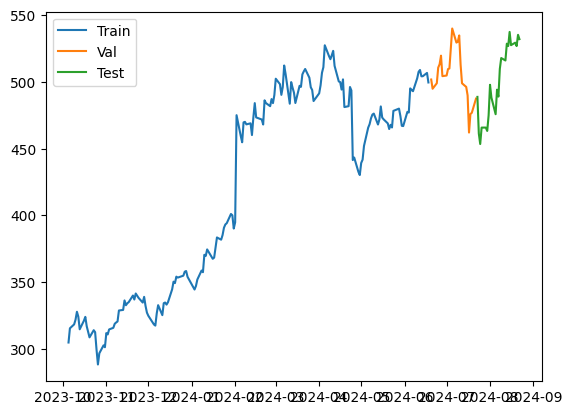

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 729ms/step - loss: 180785.1562 - mean_absolute_error: 418.0056

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 180777.9844 - mean_absolute_error: 418.0024 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 180434.0000 - mean_absolute_error: 417.6790 - val_loss: 253117.8594 - val_mean_absolute_error: 502.7452


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 176008.4375 - mean_absolute_error: 413.3406

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 177109.6406 - mean_absolute_error: 414.0733

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 177223.2656 - mean_absolute_error: 414.1634 - val_loss: 249146.7656 - val_mean_absolute_error: 498.7802


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 176847.6562 - mean_absolute_error: 413.2473

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 175963.7812 - mean_absolute_error: 412.4146

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 175066.2969 - mean_absolute_error: 411.3392 - val_loss: 239794.2500 - val_mean_absolute_error: 489.3143


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 166240.9844 - mean_absolute_error: 400.6183

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 162693.7344 - mean_absolute_error: 395.9304

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 162298.3281 - mean_absolute_error: 395.4687 - val_loss: 217319.4844 - val_mean_absolute_error: 465.7827


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 149603.1719 - mean_absolute_error: 378.2402

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 142266.0938 - mean_absolute_error: 368.6590

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 140521.4531 - mean_absolute_error: 366.3821 - val_loss: 171494.1250 - val_mean_absolute_error: 413.6726


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 120767.9375 - mean_absolute_error: 340.3994

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 106440.2266 - mean_absolute_error: 316.0096

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 101325.1953 - mean_absolute_error: 306.8451 - val_loss: 88319.7422 - val_mean_absolute_error: 296.5518


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 47902.5625 - mean_absolute_error: 202.2425

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 36191.8008 - mean_absolute_error: 167.6075

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32819.4023 - mean_absolute_error: 157.1007 - val_loss: 3242.4602 - val_mean_absolute_error: 53.4417


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8275.5771 - mean_absolute_error: 74.8753

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11547.8789 - mean_absolute_error: 84.2392

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12832.3906 - mean_absolute_error: 89.0268 - val_loss: 598.7042 - val_mean_absolute_error: 20.2003


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13736.5293 - mean_absolute_error: 95.7513

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12447.3975 - mean_absolute_error: 88.0497

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11851.1455 - mean_absolute_error: 86.0734 - val_loss: 9649.7178 - val_mean_absolute_error: 96.3399


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5977.2646 - mean_absolute_error: 73.5983

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6380.6489 - mean_absolute_error: 74.3827

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6625.5737 - mean_absolute_error: 74.8838 - val_loss: 20595.3594 - val_mean_absolute_error: 142.2294


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8242.0938 - mean_absolute_error: 75.4100

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8667.9717 - mean_absolute_error: 79.9196

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8528.0996 - mean_absolute_error: 79.5335 - val_loss: 13117.1562 - val_mean_absolute_error: 112.9251


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7039.4932 - mean_absolute_error: 79.3120

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6265.8994 - mean_absolute_error: 74.7701

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6121.4585 - mean_absolute_error: 73.9071 - val_loss: 5354.6831 - val_mean_absolute_error: 70.6376


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5361.6689 - mean_absolute_error: 67.1549

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6022.6787 - mean_absolute_error: 69.3493

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6124.7646 - mean_absolute_error: 69.6767 - val_loss: 4317.1558 - val_mean_absolute_error: 62.8671


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5007.9785 - mean_absolute_error: 62.0803

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5717.2651 - mean_absolute_error: 67.8532

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5793.7822 - mean_absolute_error: 68.6190 - val_loss: 8324.2490 - val_mean_absolute_error: 89.2144


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5651.1431 - mean_absolute_error: 69.8836

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5924.4580 - mean_absolute_error: 72.8325

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5901.4385 - mean_absolute_error: 72.6918 - val_loss: 10978.9365 - val_mean_absolute_error: 103.0299


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5320.3770 - mean_absolute_error: 66.9429

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5870.4429 - mean_absolute_error: 71.7507

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5898.4824 - mean_absolute_error: 72.0830 - val_loss: 9160.6709 - val_mean_absolute_error: 93.7943


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4971.0112 - mean_absolute_error: 65.6433

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5415.9585 - mean_absolute_error: 69.4493

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5416.8745 - mean_absolute_error: 69.5722 - val_loss: 6543.5063 - val_mean_absolute_error: 78.7231


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 4890.3584 - mean_absolute_error: 65.9917

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 4881.3086 - mean_absolute_error: 65.6449

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 4825.3296 - mean_absolute_error: 65.3944

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 4784.9702 - mean_absolute_error: 65.1781 - val_loss: 5960.4575 - val_mean_absolute_error: 74.9954


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4051.7297 - mean_absolute_error: 59.1878

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 4236.9248 - mean_absolute_error: 61.3146

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4188.0239 - mean_absolute_error: 61.1373

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4105.7524 - mean_absolute_error: 60.4103 - val_loss: 5034.4287 - val_mean_absolute_error: 68.6279


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3431.5562 - mean_absolute_error: 55.7034

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3352.4985 - mean_absolute_error: 54.7563

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3177.9407 - mean_absolute_error: 53.1109 - val_loss: 3989.9202 - val_mean_absolute_error: 60.8322


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2047.2013 - mean_absolute_error: 42.6427

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1921.9006 - mean_absolute_error: 40.3397

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1864.9922 - mean_absolute_error: 39.6670 - val_loss: 1511.4120 - val_mean_absolute_error: 35.4254


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1267.5354 - mean_absolute_error: 32.5681

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1002.8657 - mean_absolute_error: 28.0171

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 916.2808 - mean_absolute_error: 26.3850 - val_loss: 658.5695 - val_mean_absolute_error: 21.8981


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 242.6276 - mean_absolute_error: 12.6899

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 255.2877 - mean_absolute_error: 12.5445

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 246.3191 - mean_absolute_error: 12.1898 - val_loss: 296.3076 - val_mean_absolute_error: 13.1476


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 227.0199 - mean_absolute_error: 10.1051

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 205.2943 - mean_absolute_error: 10.3792

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 203.2898 - mean_absolute_error: 10.2876 - val_loss: 228.4198 - val_mean_absolute_error: 11.3386


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 262.0317 - mean_absolute_error: 9.4864

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 233.3890 - mean_absolute_error: 9.7712

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 213.8986 - mean_absolute_error: 9.4885 - val_loss: 353.8750 - val_mean_absolute_error: 14.7069


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 172.4264 - mean_absolute_error: 9.5435

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 165.1663 - mean_absolute_error: 9.3109

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 162.7358 - mean_absolute_error: 9.2853 - val_loss: 293.9777 - val_mean_absolute_error: 12.8820


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 105.5927 - mean_absolute_error: 7.7462

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 155.2398 - mean_absolute_error: 8.4982

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 157.5685 - mean_absolute_error: 8.6137 - val_loss: 556.5668 - val_mean_absolute_error: 20.9613


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 202.4310 - mean_absolute_error: 12.9315

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 207.8252 - mean_absolute_error: 11.9150

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 213.2775 - mean_absolute_error: 11.9410 - val_loss: 284.1895 - val_mean_absolute_error: 12.7776


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 104.1645 - mean_absolute_error: 8.1488

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 138.3500 - mean_absolute_error: 9.1319

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 147.2014 - mean_absolute_error: 9.3007 - val_loss: 199.4070 - val_mean_absolute_error: 10.2241


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 164.2033 - mean_absolute_error: 8.0726

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 149.6248 - mean_absolute_error: 8.9916

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 153.0831 - mean_absolute_error: 9.1769 - val_loss: 192.7623 - val_mean_absolute_error: 10.0199


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 94.6118 - mean_absolute_error: 8.2807

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 181.1366 - mean_absolute_error: 9.1173

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 181.4736 - mean_absolute_error: 9.2261 - val_loss: 275.0372 - val_mean_absolute_error: 12.6664


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 102.1443 - mean_absolute_error: 8.5333

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 120.3114 - mean_absolute_error: 8.7726

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 152.5524 - mean_absolute_error: 9.3734

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 161.4552 - mean_absolute_error: 9.5255 - val_loss: 186.8303 - val_mean_absolute_error: 10.0435


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 289.4494 - mean_absolute_error: 10.8955

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 215.0144 - mean_absolute_error: 9.8379 

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 191.3557 - mean_absolute_error: 9.6604

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 177.5210 - mean_absolute_error: 9.4949 - val_loss: 265.0305 - val_mean_absolute_error: 12.3740


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 90.8276 - mean_absolute_error: 7.9118

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 136.3536 - mean_absolute_error: 8.2216

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 134.4848 - mean_absolute_error: 8.1734

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 133.4258 - mean_absolute_error: 8.1587 - val_loss: 192.2541 - val_mean_absolute_error: 10.0475


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 237.8759 - mean_absolute_error: 10.5009

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 174.9465 - mean_absolute_error: 9.0932 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 160.7474 - mean_absolute_error: 8.8510 - val_loss: 198.4926 - val_mean_absolute_error: 10.2468


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 45.4718 - mean_absolute_error: 5.6088

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 72.0131 - mean_absolute_error: 6.3805

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 87.9161 - mean_absolute_error: 6.7087 - val_loss: 172.0528 - val_mean_absolute_error: 9.5197


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 185.0012 - mean_absolute_error: 9.1825

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 186.6267 - mean_absolute_error: 9.4080

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 175.3432 - mean_absolute_error: 9.2105 - val_loss: 205.6774 - val_mean_absolute_error: 10.5260


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 282.9970 - mean_absolute_error: 9.9812

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 192.5091 - mean_absolute_error: 9.0208

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 180.1001 - mean_absolute_error: 8.9332 - val_loss: 351.6372 - val_mean_absolute_error: 15.8029


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 267.3360 - mean_absolute_error: 10.6069

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 208.2987 - mean_absolute_error: 9.7436 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 187.4031 - mean_absolute_error: 9.5634 - val_loss: 209.1254 - val_mean_absolute_error: 10.6635


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 82.8838 - mean_absolute_error: 7.8586

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 125.4377 - mean_absolute_error: 8.3758

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 134.5107 - mean_absolute_error: 8.4754 - val_loss: 179.0705 - val_mean_absolute_error: 9.7607


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 97.9872 - mean_absolute_error: 7.6551

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 156.3065 - mean_absolute_error: 8.1619

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 149.4499 - mean_absolute_error: 8.0410 - val_loss: 228.2562 - val_mean_absolute_error: 11.2627


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 88.9051 - mean_absolute_error: 7.4764

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 93.0229 - mean_absolute_error: 7.2878

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 108.5455 - mean_absolute_error: 7.4963 - val_loss: 264.6740 - val_mean_absolute_error: 12.5727


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 67.3956 - mean_absolute_error: 6.1014

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 122.0311 - mean_absolute_error: 7.2443

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 125.3150 - mean_absolute_error: 7.4663 - val_loss: 228.8619 - val_mean_absolute_error: 11.2903


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 59.6738 - mean_absolute_error: 6.0877

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 99.6576 - mean_absolute_error: 7.7641

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 110.5278 - mean_absolute_error: 7.8836 - val_loss: 168.9780 - val_mean_absolute_error: 9.3507


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 77.0375 - mean_absolute_error: 7.2441

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 108.1963 - mean_absolute_error: 7.2434

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 108.9583 - mean_absolute_error: 7.1253 - val_loss: 202.6140 - val_mean_absolute_error: 10.4792


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 43.4556 - mean_absolute_error: 5.0221

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 120.0588 - mean_absolute_error: 6.6606

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 115.6718 - mean_absolute_error: 6.6422 - val_loss: 283.7290 - val_mean_absolute_error: 13.3987


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 69.4499 - mean_absolute_error: 7.2027

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.1550 - mean_absolute_error: 6.9439

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 92.9033 - mean_absolute_error: 7.0181 - val_loss: 194.0463 - val_mean_absolute_error: 10.2980


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 66.0328 - mean_absolute_error: 6.4782

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 101.4559 - mean_absolute_error: 7.1666

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 108.1331 - mean_absolute_error: 7.3038 - val_loss: 171.9142 - val_mean_absolute_error: 9.6404


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 50.9570 - mean_absolute_error: 5.6372

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 68.7555 - mean_absolute_error: 6.2242

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84.8169 - mean_absolute_error: 6.5517 - val_loss: 163.7618 - val_mean_absolute_error: 9.3620


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 123.1419 - mean_absolute_error: 9.2962

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 146.2950 - mean_absolute_error: 8.2710

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 138.3122 - mean_absolute_error: 7.9375 - val_loss: 168.1710 - val_mean_absolute_error: 9.4620


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 112.3702 - mean_absolute_error: 9.0101

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 136.7218 - mean_absolute_error: 8.2054

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 131.3560 - mean_absolute_error: 7.9221 - val_loss: 192.4528 - val_mean_absolute_error: 10.3090


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 42.7759 - mean_absolute_error: 5.3799

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 63.0838 - mean_absolute_error: 6.1176

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.7092 - mean_absolute_error: 6.4039 - val_loss: 201.3060 - val_mean_absolute_error: 10.6306


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 226.6829 - mean_absolute_error: 7.6045

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 150.5125 - mean_absolute_error: 7.2397

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 137.8267 - mean_absolute_error: 7.0939 - val_loss: 220.3507 - val_mean_absolute_error: 11.2422


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 319.3922 - mean_absolute_error: 9.9660

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 228.1442 - mean_absolute_error: 9.0330

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 168.5419 - mean_absolute_error: 8.2390 - val_loss: 277.1162 - val_mean_absolute_error: 13.4587


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 136.1553 - mean_absolute_error: 10.1434

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 145.7092 - mean_absolute_error: 9.0654 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 141.3419 - mean_absolute_error: 8.8861 - val_loss: 345.4264 - val_mean_absolute_error: 15.8618


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 377.1655 - mean_absolute_error: 13.0640

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 233.7051 - mean_absolute_error: 9.8294 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 206.2643 - mean_absolute_error: 9.3249

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 197.6850 - mean_absolute_error: 9.1579 - val_loss: 288.1316 - val_mean_absolute_error: 13.9034


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 338.2033 - mean_absolute_error: 11.0893

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 209.3506 - mean_absolute_error: 8.8922 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 182.7401 - mean_absolute_error: 8.4652 - val_loss: 265.8586 - val_mean_absolute_error: 13.0787


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 81.6071 - mean_absolute_error: 7.5056

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 79.4362 - mean_absolute_error: 7.1147

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 90.8732 - mean_absolute_error: 7.2292

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 93.9788 - mean_absolute_error: 7.2610 - val_loss: 158.4762 - val_mean_absolute_error: 9.3082


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 139.1901 - mean_absolute_error: 7.0447

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 117.1829 - mean_absolute_error: 7.3294

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 119.4684 - mean_absolute_error: 7.4635 - val_loss: 164.0003 - val_mean_absolute_error: 9.4816


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 112.9835 - mean_absolute_error: 8.6555

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 114.1430 - mean_absolute_error: 8.2539

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 125.9357 - mean_absolute_error: 8.2586 - val_loss: 156.0778 - val_mean_absolute_error: 9.0855


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 165.4409 - mean_absolute_error: 8.0604

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 122.5264 - mean_absolute_error: 7.3151

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 127.3678 - mean_absolute_error: 7.5873 - val_loss: 159.2088 - val_mean_absolute_error: 9.2219


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 118.8701 - mean_absolute_error: 8.6261

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 104.2992 - mean_absolute_error: 7.9011

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 114.5349 - mean_absolute_error: 7.8810 - val_loss: 156.9309 - val_mean_absolute_error: 9.0379


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 73.2846 - mean_absolute_error: 6.8260

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 96.2579 - mean_absolute_error: 7.5141

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 104.9848 - mean_absolute_error: 7.5760 - val_loss: 165.2710 - val_mean_absolute_error: 9.5478


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 215.1220 - mean_absolute_error: 10.1988

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 191.0341 - mean_absolute_error: 10.3221

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 182.3231 - mean_absolute_error: 10.1468 - val_loss: 186.5458 - val_mean_absolute_error: 10.2807


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 266.2822 - mean_absolute_error: 8.2156

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 226.1514 - mean_absolute_error: 9.2924

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 206.4854 - mean_absolute_error: 9.1412

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 200.3564 - mean_absolute_error: 9.0983 - val_loss: 302.5625 - val_mean_absolute_error: 14.3153


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 131.1552 - mean_absolute_error: 8.1953

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 128.1152 - mean_absolute_error: 7.9336

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 125.8787 - mean_absolute_error: 7.8313 - val_loss: 313.9952 - val_mean_absolute_error: 14.7314


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 104.2407 - mean_absolute_error: 9.0909

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 112.4960 - mean_absolute_error: 8.7312

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 118.4424 - mean_absolute_error: 8.7274 - val_loss: 177.7489 - val_mean_absolute_error: 10.0144


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 60.6567 - mean_absolute_error: 6.0528

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.8728 - mean_absolute_error: 6.1465

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 81.4688 - mean_absolute_error: 6.3524 - val_loss: 158.8119 - val_mean_absolute_error: 9.1994


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 44.8739 - mean_absolute_error: 5.1989

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 107.5184 - mean_absolute_error: 6.3563

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 107.4839 - mean_absolute_error: 6.4746 - val_loss: 224.9681 - val_mean_absolute_error: 11.4646


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 66.2413 - mean_absolute_error: 6.4111

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 67.2640 - mean_absolute_error: 6.2984

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.2228 - mean_absolute_error: 6.5058 - val_loss: 209.2143 - val_mean_absolute_error: 11.0384


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 57.1060 - mean_absolute_error: 6.1989

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 88.0482 - mean_absolute_error: 6.9647

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 100.9828 - mean_absolute_error: 7.3149 - val_loss: 220.5093 - val_mean_absolute_error: 11.4200


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 95.5005 - mean_absolute_error: 7.4138

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 104.9780 - mean_absolute_error: 7.5416

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 108.0094 - mean_absolute_error: 7.5100 - val_loss: 153.7540 - val_mean_absolute_error: 8.8784


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 63.1405 - mean_absolute_error: 6.3892

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.6114 - mean_absolute_error: 6.3360

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 86.6590 - mean_absolute_error: 6.5324 - val_loss: 154.5320 - val_mean_absolute_error: 8.9242


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 83.4589 - mean_absolute_error: 6.7209

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 89.7729 - mean_absolute_error: 6.6331

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 94.0010 - mean_absolute_error: 6.5860 - val_loss: 225.3522 - val_mean_absolute_error: 11.5902


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 94.7143 - mean_absolute_error: 7.6372

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 120.2539 - mean_absolute_error: 7.4674

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 115.9887 - mean_absolute_error: 7.2725 - val_loss: 209.1486 - val_mean_absolute_error: 11.0781


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 55.3642 - mean_absolute_error: 5.4528

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 63.1431 - mean_absolute_error: 5.6841

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 74.8496 - mean_absolute_error: 6.0206

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 79.1114 - mean_absolute_error: 6.1311 - val_loss: 223.7319 - val_mean_absolute_error: 11.5583


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 222.8598 - mean_absolute_error: 7.3741

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 162.6981 - mean_absolute_error: 6.9296

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 139.2055 - mean_absolute_error: 7.0618 - val_loss: 193.5628 - val_mean_absolute_error: 10.5759


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 297.3279 - mean_absolute_error: 8.3146

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 175.8177 - mean_absolute_error: 7.5407

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 156.4403 - mean_absolute_error: 7.3227 - val_loss: 184.8269 - val_mean_absolute_error: 10.3324


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 76.8425 - mean_absolute_error: 7.3338

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 82.2446 - mean_absolute_error: 6.6026

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 87.6257 - mean_absolute_error: 6.5480 - val_loss: 150.3138 - val_mean_absolute_error: 8.9405


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 92.4056 - mean_absolute_error: 7.9009

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 88.3238 - mean_absolute_error: 6.8785

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 93.2924 - mean_absolute_error: 6.8500 - val_loss: 153.7521 - val_mean_absolute_error: 9.3173


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 53.9027 - mean_absolute_error: 6.0180

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 93.6057 - mean_absolute_error: 6.5774

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 95.9428 - mean_absolute_error: 6.5944 - val_loss: 156.2001 - val_mean_absolute_error: 9.4852


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 192.3406 - mean_absolute_error: 6.2430

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 141.5728 - mean_absolute_error: 6.9343

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 135.8970 - mean_absolute_error: 7.0664 - val_loss: 168.7961 - val_mean_absolute_error: 9.9224


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 43.9662 - mean_absolute_error: 5.4058

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 81.6234 - mean_absolute_error: 6.5141

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 92.4219 - mean_absolute_error: 6.6234 - val_loss: 173.8183 - val_mean_absolute_error: 10.0506


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 40.2450 - mean_absolute_error: 4.8674

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 63.9291 - mean_absolute_error: 5.5788

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 75.4375 - mean_absolute_error: 5.8611 - val_loss: 271.3298 - val_mean_absolute_error: 13.3310


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 134.0514 - mean_absolute_error: 9.6656

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 199.3988 - mean_absolute_error: 10.0585

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 177.5477 - mean_absolute_error: 9.3833 - val_loss: 233.5212 - val_mean_absolute_error: 11.9239


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 226.0258 - mean_absolute_error: 7.5184

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 143.9156 - mean_absolute_error: 6.9420

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 133.1342 - mean_absolute_error: 6.8698 - val_loss: 155.8716 - val_mean_absolute_error: 9.3910


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 68.6150 - mean_absolute_error: 6.9335

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 105.5708 - mean_absolute_error: 6.6979

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 103.7848 - mean_absolute_error: 6.6321 - val_loss: 155.6619 - val_mean_absolute_error: 9.4199


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 36.5354 - mean_absolute_error: 4.6370

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.0328 - mean_absolute_error: 5.9103

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 82.4762 - mean_absolute_error: 6.0878 - val_loss: 153.3828 - val_mean_absolute_error: 9.3345


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 40.2249 - mean_absolute_error: 5.0315

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 60.3180 - mean_absolute_error: 5.4880

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 72.5086 - mean_absolute_error: 5.7297 - val_loss: 149.2977 - val_mean_absolute_error: 8.7582


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 256.1961 - mean_absolute_error: 9.7297

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 156.1496 - mean_absolute_error: 8.1969

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 142.9728 - mean_absolute_error: 7.9381 - val_loss: 159.4622 - val_mean_absolute_error: 9.6263


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 56.1302 - mean_absolute_error: 6.1199

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 124.7485 - mean_absolute_error: 7.1166

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 118.2057 - mean_absolute_error: 6.9825 - val_loss: 193.2814 - val_mean_absolute_error: 10.7552


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 302.3727 - mean_absolute_error: 9.8114

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 168.1444 - mean_absolute_error: 7.6773

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 149.2395 - mean_absolute_error: 7.4016 - val_loss: 182.5446 - val_mean_absolute_error: 10.4014


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 251.0789 - mean_absolute_error: 8.8979

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 164.8270 - mean_absolute_error: 7.7379

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 149.9966 - mean_absolute_error: 7.4912 - val_loss: 225.0695 - val_mean_absolute_error: 11.8254


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 72.7966 - mean_absolute_error: 6.4384

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 119.2425 - mean_absolute_error: 7.1591

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 119.5657 - mean_absolute_error: 7.2220 - val_loss: 300.6947 - val_mean_absolute_error: 14.4034


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 92.7952 - mean_absolute_error: 8.2183

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 93.0297 - mean_absolute_error: 8.1999

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 103.9226 - mean_absolute_error: 8.0586

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 112.7315 - mean_absolute_error: 8.1932

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 130.5549 - mean_absolute_error: 8.6528

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 135.1541 - mean_absolute_error: 8.7725 - val_loss: 334.0636 - val_mean_absolute_error: 15.5216


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 124.1917 - mean_absolute_error: 9.0917

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 117.5999 - mean_absolute_error: 8.2883

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 123.7625 - mean_absolute_error: 8.1107 - val_loss: 155.4937 - val_mean_absolute_error: 9.4375


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 156.4833 - mean_absolute_error: 8.4220

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 131.8083 - mean_absolute_error: 8.6258

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 132.8923 - mean_absolute_error: 8.6552 - val_loss: 155.1955 - val_mean_absolute_error: 8.9655


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 101.6448 - mean_absolute_error: 8.1940

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 142.0023 - mean_absolute_error: 8.2916

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 140.7924 - mean_absolute_error: 8.2483 - val_loss: 161.4733 - val_mean_absolute_error: 9.3274


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 94.1504 - mean_absolute_error: 8.2246

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 102.4045 - mean_absolute_error: 7.8605

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 112.9550 - mean_absolute_error: 7.7844 - val_loss: 151.8083 - val_mean_absolute_error: 8.8058


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 95.4664 - mean_absolute_error: 7.8072

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 94.6160 - mean_absolute_error: 7.0216

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 96.9350 - mean_absolute_error: 6.9813 - val_loss: 188.6463 - val_mean_absolute_error: 10.4375


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


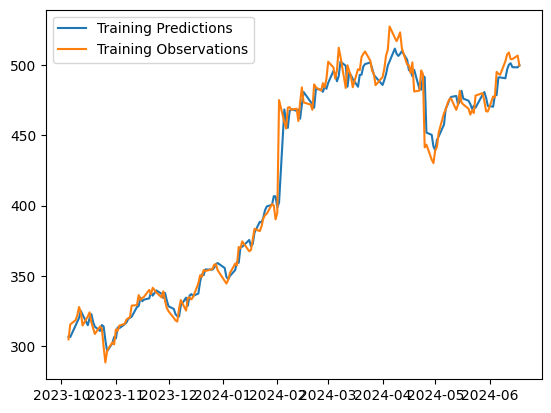

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + "training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


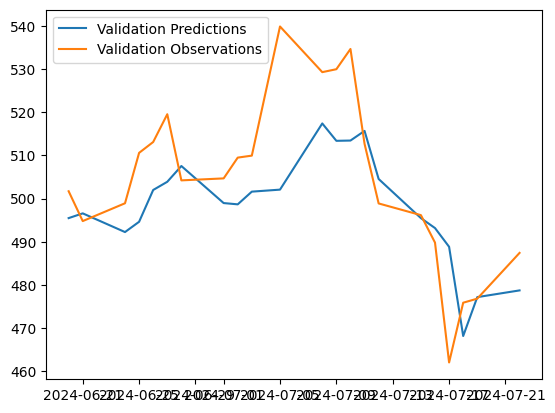

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + "validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


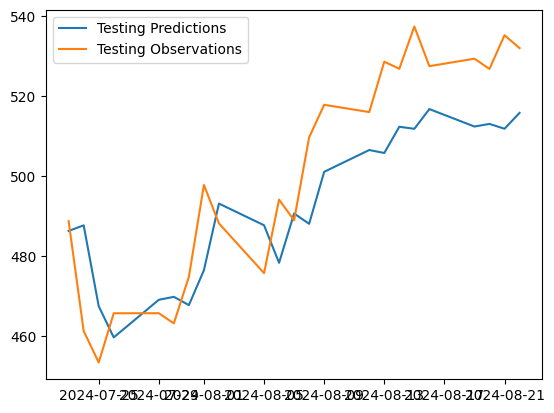

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + "testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
